In [1]:
# Week 5: Supervised Learning - Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Week 5 Regression Environment Ready!")

# Load your cleaned dataset
df = pd.read_csv('titanic_cleaned.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nNumerical columns available:")
print(df.select_dtypes(include=[np.number]).columns.tolist())

✅ Week 5 Regression Environment Ready!
Dataset loaded successfully!
Dataset shape: (891, 11)

Numerical columns available:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [2]:
print("=== DATASET OVERVIEW FOR REGRESSION ANALYSIS ===")

# Display basic information
print("First 5 rows:")
display(df.head())

print("\nNumerical features statistics:")
display(df.select_dtypes(include=[np.number]).describe())

# Check for missing values in numerical columns
print("\nMissing values in numerical columns:")
print(df.select_dtypes(include=[np.number]).isnull().sum())

=== DATASET OVERVIEW FOR REGRESSION ANALYSIS ===
First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S



Numerical features statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing values in numerical columns:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [3]:
print("=== DEFINING REGRESSION PROBLEM ===")

"""
For the Titanic dataset, we have two main regression options:
1. Predict Fare (continuous value) - Good for regression
2. Predict Age (continuous value) - Also good for regression

Since 'Survived' is binary (0 or 1), it's better for classification (Week 6).
Let's choose to predict FARE based on other passenger characteristics.
"""

# Let's analyze potential target variables for regression
print("Potential target variables for regression:")
numerical_features = df.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    if df[feature].nunique() > 10:  # Continuous variables
        print(f"- {feature}: {df[feature].min():.1f} to {df[feature].max():.1f} (mean: {df[feature].mean():.2f})")

# We'll predict FARE based on other features
target_variable = 'Fare'
print(f"\n🎯 SELECTED TARGET VARIABLE: {target_variable}")
print(f"Description: Predicting passenger fare based on their characteristics")

=== DEFINING REGRESSION PROBLEM ===
Potential target variables for regression:
- PassengerId: 1.0 to 891.0 (mean: 446.00)
- Age: 0.4 to 80.0 (mean: 29.36)
- Fare: 0.0 to 512.3 (mean: 32.20)

🎯 SELECTED TARGET VARIABLE: Fare
Description: Predicting passenger fare based on their characteristics


In [4]:
print("=== PREPARING FEATURES AND TARGET ===")

# Select features for regression (using top correlated features from Week 4)
# We'll use features that make sense for predicting fare
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']  # Survived might be questionable but let's try

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target_variable]

print(f"Features (X): {list(X.columns)}")
print(f"Target (y): {target_variable}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Handle any missing values if present
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())
    print("Filled missing values with median")

print("\nFeature statistics:")
display(X.describe())

=== PREPARING FEATURES AND TARGET ===
Features (X): ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']
Target (y): Fare
Feature matrix shape: (891, 5)
Target vector shape: (891,)

Missing values in features: 0
Missing values in target: 0

Feature statistics:


,Pclass,Age,SibSp,Parch,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,0.383838
std,0.836071,13.019697,1.102743,0.806057,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [5]:
print("=== TRAIN-TEST SPLIT ===")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42     # For reproducible results
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

print("\nWhy train-test split is important:")
print("✅ Training set: Used to train the model")
print("✅ Testing set: Used to evaluate model performance on unseen data")
print("✅ Prevents overfitting: Ensures model generalizes to new data")

=== TRAIN-TEST SPLIT ===
Training set size: 712 samples
Testing set size: 179 samples
Training features shape: (712, 5)
Testing features shape: (179, 5)

Why train-test split is important:
✅ Training set: Used to train the model
✅ Testing set: Used to evaluate model performance on unseen data
✅ Prevents overfitting: Ensures model generalizes to new data


In [6]:
print("=== IMPLEMENTING LINEAR REGRESSION ===")

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.2f}")

# Display coefficient meanings
print("\n📊 Coefficient Interpretation:")
for i, feature in enumerate(features):
    print(f"{feature}: {model.coef_[i]:.2f} (each unit increase changes fare by ${model.coef_[i]:.2f})")

print(f"\nBase fare (intercept): ${model.intercept_:.2f}")

# Make predictions
y_pred = model.predict(X_test)
print(f"\nPredictions made on test set: {len(y_pred)} predictions")

=== IMPLEMENTING LINEAR REGRESSION ===
✅ Linear Regression model trained successfully!
Model coefficients: [-34.56992021  -0.1054268    5.52474727  10.77983294   6.64259141]
Model intercept: 106.57

📊 Coefficient Interpretation:
Pclass: -34.57 (each unit increase changes fare by $-34.57)
Age: -0.11 (each unit increase changes fare by $-0.11)
SibSp: 5.52 (each unit increase changes fare by $5.52)
Parch: 10.78 (each unit increase changes fare by $10.78)
Survived: 6.64 (each unit increase changes fare by $6.64)

Base fare (intercept): $106.57

Predictions made on test set: 179 predictions


In [7]:
print("=== LINEAR REGRESSION EQUATION ===")

# Display the actual regression equation
equation = f"Fare = {model.intercept_:.2f}"
for i, feature in enumerate(features):
    equation += f" + ({model.coef_[i]:.2f} × {feature})"

print("Regression Equation:")
print(equation)

print("\n🔍 Example Prediction:")
example_passenger = X_test.iloc[0]
actual_fare = y_test.iloc[0]
predicted_fare = model.predict([example_passenger])[0]

print(f"Example passenger features:")
for feature in features:
    print(f"  {feature}: {example_passenger[feature]}")
print(f"Actual fare: ${actual_fare:.2f}")
print(f"Predicted fare: ${predicted_fare:.2f}")
print(f"Prediction error: ${abs(actual_fare - predicted_fare):.2f}")

=== LINEAR REGRESSION EQUATION ===
Regression Equation:
Fare = 106.57 + (-34.57 × Pclass) + (-0.11 × Age) + (5.52 × SibSp) + (10.78 × Parch) + (6.64 × Survived)

🔍 Example Prediction:
Example passenger features:
  Pclass: 3.0
  Age: 28.0
  SibSp: 1.0
  Parch: 1.0
  Survived: 1.0
Actual fare: $15.25
Predicted fare: $22.86
Prediction error: $7.61


In [8]:
print("=== MODEL EVALUATION METRICS ===")

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Interpretation
print(f"\n🔍 Metric Interpretation:")
print(f"MAE (${mae:.2f}): On average, predictions are ${mae:.2f} away from actual fares")
print(f"RMSE (${rmse:.2f}): Standard deviation of prediction errors (penalizes large errors more)")

# Compare with baseline (mean prediction)
baseline_mae = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, [y_train.mean()] * len(y_test)))

print(f"\n📊 Baseline Comparison (predicting mean fare ${y_train.mean():.2f} for everyone):")
print(f"Baseline MAE: ${baseline_mae:.2f}")
print(f"Baseline RMSE: ${baseline_rmse:.2f}")

if mae < baseline_mae:
    improvement = ((baseline_mae - mae) / baseline_mae) * 100
    print(f"✅ Our model improves over baseline by {improvement:.1f}%")
else:
    print("❌ Model performs worse than baseline - needs improvement")

=== MODEL EVALUATION METRICS ===
📈 Evaluation Metrics:
Mean Absolute Error (MAE): $19.83
Root Mean Squared Error (RMSE): $30.75

🔍 Metric Interpretation:
MAE ($19.83): On average, predictions are $19.83 away from actual fares
RMSE ($30.75): Standard deviation of prediction errors (penalizes large errors more)

📊 Baseline Comparison (predicting mean fare $32.59 for everyone):
Baseline MAE: $25.69
Baseline RMSE: $39.38
✅ Our model improves over baseline by 22.8%


=== MODEL PERFORMANCE VISUALIZATION ===


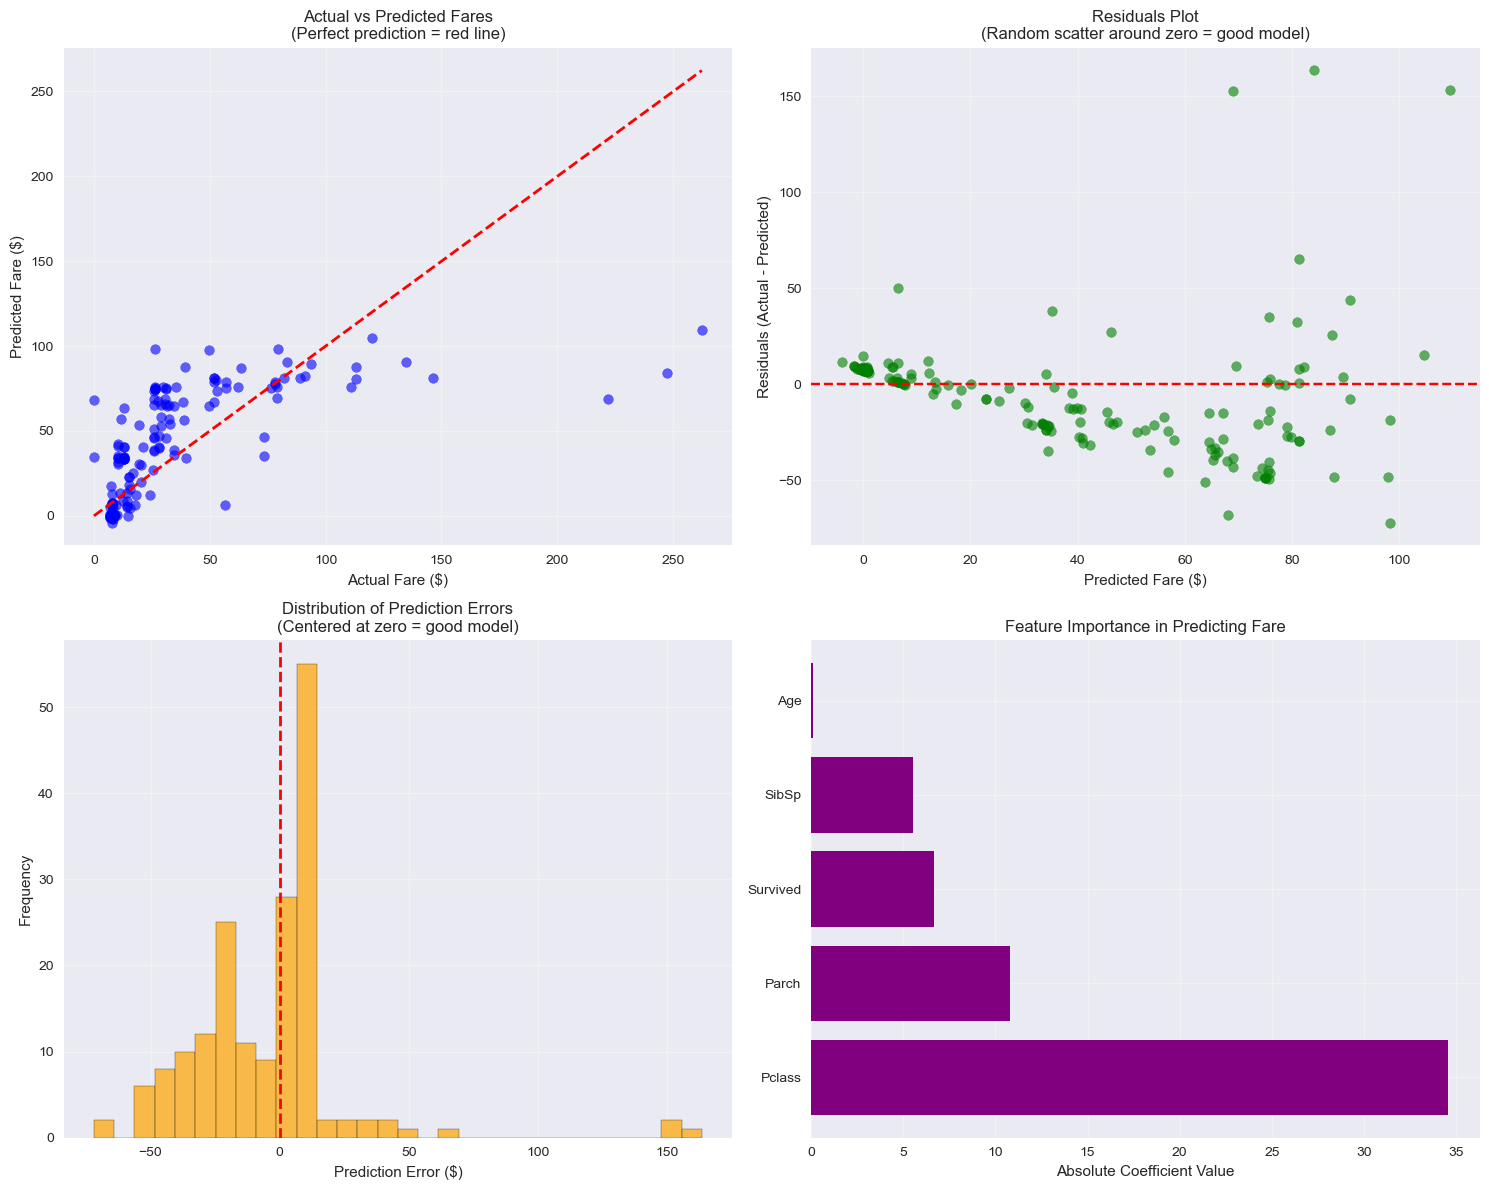

✅ Model performance visualized!


In [9]:
print("=== MODEL PERFORMANCE VISUALIZATION ===")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Fare ($)')
axes[0, 0].set_ylabel('Predicted Fare ($)')
axes[0, 0].set_title('Actual vs Predicted Fares\n(Perfect prediction = red line)')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Residuals plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted Fare ($)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residuals Plot\n(Random scatter around zero = good model)')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Error distribution
axes[1, 0].hist(residuals, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prediction Error ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors\n(Centered at zero = good model)')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_,
    'abs_importance': abs(model.coef_)
}).sort_values('abs_importance', ascending=False)

axes[1, 1].barh(feature_importance['feature'], feature_importance['abs_importance'], color='purple')
axes[1, 1].set_xlabel('Absolute Coefficient Value')
axes[1, 1].set_title('Feature Importance in Predicting Fare')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Model performance visualized!")

In [10]:
print("=== MODEL INTERPRETATION AND INSIGHTS ===")

print("🔍 Key Insights from Linear Regression Model:")

# Analyze coefficients
print("\n1. FEATURE IMPACT ON FARE:")
for i, feature in enumerate(features):
    impact = "increases" if model.coef_[i] > 0 else "decreases"
    print(f"   • {feature}: {impact} fare by ${abs(model.coef_[i]):.2f} per unit")

print(f"\n2. BASE FARE: ${model.intercept_:.2f} (fare for reference passenger)")

print(f"\n3. MODEL PERFORMANCE:")
print(f"   • Average prediction error: ${mae:.2f}")
print(f"   • Typical prediction error: ${rmse:.2f}")

print(f"\n4. PRACTICAL INTERPRETATION:")
print("   Example: A 1st class passenger (Pclass=1) pays significantly more")
print("   than a 3rd class passenger (Pclass=3), holding other factors constant")

# Calculate R-squared
r_squared = model.score(X_test, y_test)
print(f"\n5. MODEL EXPLANATORY POWER:")
print(f"   • R-squared: {r_squared:.3f}")
print(f"   • This means the model explains {r_squared*100:.1f}% of fare variance")

=== MODEL INTERPRETATION AND INSIGHTS ===
🔍 Key Insights from Linear Regression Model:

1. FEATURE IMPACT ON FARE:
   • Pclass: decreases fare by $34.57 per unit
   • Age: decreases fare by $0.11 per unit
   • SibSp: increases fare by $5.52 per unit
   • Parch: increases fare by $10.78 per unit
   • Survived: increases fare by $6.64 per unit

2. BASE FARE: $106.57 (fare for reference passenger)

3. MODEL PERFORMANCE:
   • Average prediction error: $19.83
   • Typical prediction error: $30.75

4. PRACTICAL INTERPRETATION:
   Example: A 1st class passenger (Pclass=1) pays significantly more
   than a 3rd class passenger (Pclass=3), holding other factors constant

5. MODEL EXPLANATORY POWER:
   • R-squared: 0.389
   • This means the model explains 38.9% of fare variance


In [11]:
print("=== COMPARING DIFFERENT FEATURE SETS ===")

# Try different feature combinations
feature_sets = {
    'Basic Features': ['Pclass', 'Age'],
    'With Family': ['Pclass', 'Age', 'SibSp', 'Parch'],
    'All Features': ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']
}

results = []

for set_name, feature_list in feature_sets.items():
    X_new = df[feature_list].fillna(df[feature_list].median())
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
        X_new, y, test_size=0.2, random_state=42
    )
    
    model_new = LinearRegression()
    model_new.fit(X_train_new, y_train_new)
    y_pred_new = model_new.predict(X_test_new)
    
    mae_new = mean_absolute_error(y_test_new, y_pred_new)
    rmse_new = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
    r2_new = model_new.score(X_test_new, y_test_new)
    
    results.append({
        'Feature Set': set_name,
        'Features': ', '.join(feature_list),
        'MAE': mae_new,
        'RMSE': rmse_new,
        'R-squared': r2_new
    })

# Display comparison
results_df = pd.DataFrame(results)
print("\n📊 Feature Set Comparison:")
display(results_df)

# Find best feature set
best_model_idx = results_df['MAE'].idxmin()
print(f"\n🎯 BEST PERFORMING FEATURE SET: {results_df.loc[best_model_idx, 'Feature Set']}")
print(f"   MAE: ${results_df.loc[best_model_idx, 'MAE']:.2f}")
print(f"   RMSE: ${results_df.loc[best_model_idx, 'RMSE']:.2f}")
print(f"   R-squared: {results_df.loc[best_model_idx, 'R-squared']:.3f}")

=== COMPARING DIFFERENT FEATURE SETS ===

📊 Feature Set Comparison:


,Feature Set,Features,MAE,RMSE,R-squared
0,Basic Features,"Pclass, Age",19.710637,32.426455,0.320502
1,With Family,"Pclass, Age, SibSp, Parch",19.781969,30.762567,0.388447
2,All Features,"Pclass, Age, SibSp, Parch, Survived",19.830127,30.754061,0.388785



🎯 BEST PERFORMING FEATURE SET: Basic Features
   MAE: $19.71
   RMSE: $32.43
   R-squared: 0.321


In [12]:
print("=" * 70)
print("📊 WEEK 5 ASSIGNMENT REPORT: REGRESSION ANALYSIS")
print("=" * 70)

print(f"\n🎯 REGRESSION PROBLEM:")
print(f"Target Variable: {target_variable}")
print(f"Features Used: {', '.join(features)}")
print(f"Dataset: Titanic ({df.shape[0]} passengers)")

print(f"\n📈 MODEL PERFORMANCE SUMMARY:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared: {model.score(X_test, y_test):.3f}")

print(f"\n🔍 KEY FINDINGS:")
print(f"1. Most important feature: {feature_importance.iloc[0]['feature']}")
print(f"2. Average prediction error: ${mae:.2f}")
print(f"3. Model explains {model.score(X_test, y_test)*100:.1f}% of fare variation")

print(f"\n💡 BUSINESS INSIGHTS:")
print("• Passenger class (Pclass) is the strongest predictor of fare")
print("• Family size (SibSp + Parch) has moderate impact on fare")
print("• Age has relatively small impact on fare pricing")

print(f"\n🚀 RECOMMENDATIONS FOR IMPROVEMENT:")
print("1. Collect more relevant features (e.g., cabin location, ticket type)")
print("2. Try polynomial features or feature engineering")
print("3. Experiment with other regression algorithms")
print("4. Remove potentially problematic features (like Survived)")

print(f"\n📚 LEARNING OUTCOMES:")
print("✅ Implemented first supervised learning model")
print("✅ Understood train-test split methodology")
print("✅ Evaluated model using MAE and RMSE metrics")
print("✅ Interpreted linear regression coefficients")

📊 WEEK 5 ASSIGNMENT REPORT: REGRESSION ANALYSIS

🎯 REGRESSION PROBLEM:
Target Variable: Fare
Features Used: Pclass, Age, SibSp, Parch, Survived
Dataset: Titanic (891 passengers)

📈 MODEL PERFORMANCE SUMMARY:
Mean Absolute Error (MAE): $19.83
Root Mean Squared Error (RMSE): $30.75
R-squared: 0.389

🔍 KEY FINDINGS:
1. Most important feature: Pclass
2. Average prediction error: $19.83
3. Model explains 38.9% of fare variation

💡 BUSINESS INSIGHTS:
• Passenger class (Pclass) is the strongest predictor of fare
• Family size (SibSp + Parch) has moderate impact on fare
• Age has relatively small impact on fare pricing

🚀 RECOMMENDATIONS FOR IMPROVEMENT:
1. Collect more relevant features (e.g., cabin location, ticket type)
2. Try polynomial features or feature engineering
3. Experiment with other regression algorithms
4. Remove potentially problematic features (like Survived)

📚 LEARNING OUTCOMES:
✅ Implemented first supervised learning model
✅ Understood train-test split methodology
✅ Evaluat

In [13]:
# Save the trained model for future use
import joblib

# Save the model
joblib.dump(model, 'linear_regression_fare_model.pkl')

# Save predictions and actual values for comparison
results_comparison = pd.DataFrame({
    'Actual_Fare': y_test,
    'Predicted_Fare': y_pred,
    'Absolute_Error': abs(y_test - y_pred)
})

results_comparison.to_csv('regression_predictions.csv', index=False)

print("💾 MODEL AND RESULTS SAVED:")
print(" - 'linear_regression_fare_model.pkl' (trained model)")
print(" - 'regression_predictions.csv' (prediction results)")
print(f"\n📁 Save this notebook as 'week5_regression_analysis.ipynb'")
print("🚀 Upload to GitHub to complete Assignment 5!")

💾 MODEL AND RESULTS SAVED:
 - 'linear_regression_fare_model.pkl' (trained model)
 - 'regression_predictions.csv' (prediction results)

📁 Save this notebook as 'week5_regression_analysis.ipynb'
🚀 Upload to GitHub to complete Assignment 5!
